In [54]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
stroke = pd.read_excel('stroke-data.xlsx', "Data")

In [3]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
len(stroke[stroke['smoking_status']=="Unknown"])

1544

##### Here we have 1544 messing values of smoking_status and 201 of bmi

#   

### Dropped all unknown smoking_status

In [17]:
stroke = stroke.drop(list(stroke[stroke['smoking_status']=="Unknown"].index))

In [19]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64

### Preprocessing 

In [20]:
stroke['bmi'].fillna(method='pad', inplace = True)

In [21]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

####  now we don't have any missing values

#  

In [22]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [23]:
X = stroke[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status',]]
y = stroke['stroke']

In [24]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3566 non-null   int64  
 1   gender             3566 non-null   object 
 2   age                3566 non-null   float64
 3   hypertension       3566 non-null   int64  
 4   heart_disease      3566 non-null   int64  
 5   ever_married       3566 non-null   object 
 6   work_type          3566 non-null   object 
 7   Residence_type     3566 non-null   object 
 8   avg_glucose_level  3566 non-null   float64
 9   bmi                3566 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             3566 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 362.2+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cate_var = ['gender', 'ever_married', "work_type", "Residence_type", "smoking_status"]
X['gender'] = le.fit_transform(X['gender'])
X['ever_married'] = le.fit_transform(X['ever_married'])
X['work_type'] = le.fit_transform(X['work_type'])
X['Residence_type'] = le.fit_transform(X['Residence_type'])
X['smoking_status'] = le.fit_transform(X['smoking_status'])

<ipython-input-26-89910f260659>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = le.fit_transform(X['gender'])
<ipython-input-26-89910f260659>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ever_married'] = le.fit_transform(X['ever_married'])
<ipython-input-26-89910f260659>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1 )

In [55]:
from sklearn.tree import DecisionTreeClassifier
DSregressor = RandomForestClassifier()
DSregressor.fit(X_train,y_train)

RandomForestClassifier()

#### Model evaluation

In [56]:
y_pred_test=DSregressor.predict(X_test)
y_pred_train = DSregressor.predict(X_train)
from sklearn.metrics import accuracy_score
print("Testing Accuracy: ",accuracy_score(y_test,y_pred_test))
print("Training Accuracy: ",accuracy_score(y_train,y_pred_train))

Testing Accuracy:  0.9453781512605042
Training Accuracy:  1.0


In [57]:
_type = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(_type, predictions)

array([[616,  58],
       [ 32,   8]], dtype=int64)

#### Our model gives almost 94% accuracy on testing data and 100% on training data

#### Sensitivity and Specificity

In [60]:
Sensitivity = 616/(616+32)
Specificity = 8/(58+8)
print("Sensitivity: ",Sensitivity)
print("Specificity: ",Specificity)

Sensitivity:  0.9506172839506173
Specificity:  0.12121212121212122


#### Out of all the stroke patients 95% are accuractly predicted

#  

In [58]:
prob_stroke_patient = DSregressor.predict_proba(X_train)[:,0]

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

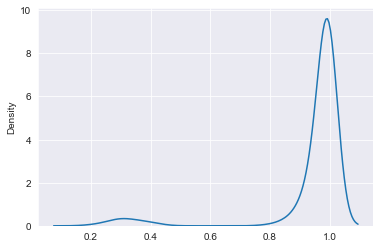

In [59]:
sns.distplot(prob_stroke_patient,hist=False)